<a href="https://colab.research.google.com/github/JonasSouza871/Estudo_machine_learning/blob/main/3.Regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Conhecendo os dados

------------------------

In [40]:
import pandas as pd

In [41]:
dados_projeto = pd.read_csv('/content/Preços_de_casas.csv') #Arquivo com os dados.
dados_projeto.head() #mostra os 5 primeiros

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


- Temos no projeto as colunas "Area_primeiro_andar" se existe_segundo_andar que irá retornar 0 e 1, "Area_segundo_andar", quantidade_de_banheiros, capacidade_de_carros_garagem, qualidade_da_cozinha_excelente, que tambem devolve uma valor 0 e 1

In [42]:
dados_projeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


 - Em primeira análise vemos que essa coluna "Id" não serve para muita coisa, então é melhor remove-la

In [43]:
dados_projeto = dados_projeto.drop (columns = 'Id') #removendo coluna ID
dados_projeto.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


# 2. Correlação

--------------------------------------

A correlação em estatística mede a relação entre duas variáveis, indicando o grau e a direção da associação entre elas. O coeficiente de correlação de Pearson (r) varia de -1 a 1: valores próximos de 1 indicam correlação positiva forte, próximos de -1 indicam correlação negativa forte e próximos de 0 indicam ausência de correlação.

In [44]:
correlacao = dados_projeto.corr()

In [45]:
correlacao['preco_de_venda'] #A influencia do preço de venda para cada outra coluna relacionado ao preço de venda
# a metrica varia entre -1 e 1.
# quanto, mais perto de 1 maior é a correlacao positiva.
#um exemplo de correlacao "quanto maior a area do promeiro andar maior o preço de venda"

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


- Vemos que preço tem mais correlação com a capacidade da caragem e da area do primeiro andar.

## Relacionando Variáveis

- Bibliotecas de plote

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

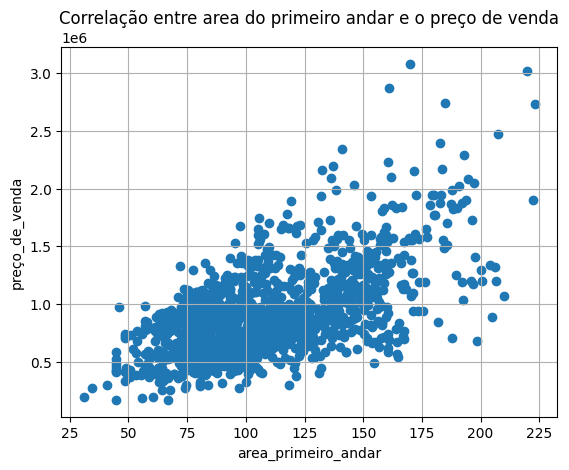

In [47]:
plt.scatter(dados_projeto['area_primeiro_andar'], dados_projeto['preco_de_venda']) #eixo de x a area do primeiro andar e eixo y o preço de venda
# assim temos uma relação comparando essas duas variaveis
plt.title('Correlação entre area do primeiro andar e o preço de venda')
plt.xlabel('area_primeiro_andar')
plt.ylabel('preço_de_venda')
plt.grid(1)

- Para adicionar uma linha:

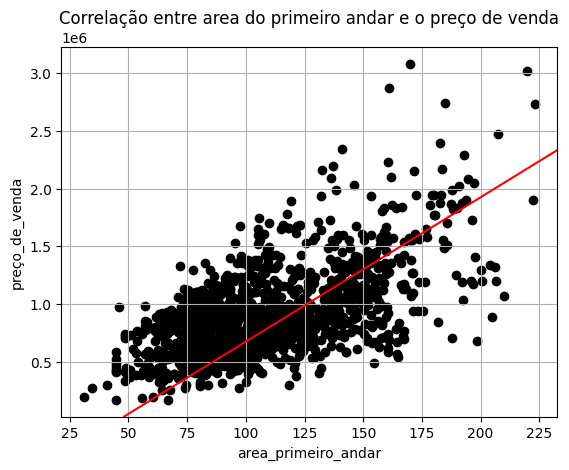

In [48]:
plt.scatter(dados_projeto['area_primeiro_andar'], dados_projeto['preco_de_venda'],color = "black") #eixo de x a area do primeiro andar e eixo y o preço de venda
# assim temos uma relação comparando essas duas variaveis
plt.title('Correlação entre area do primeiro andar e o preço de venda')
plt.xlabel('area_primeiro_andar')
plt.ylabel('preço_de_venda')
plt.grid(1)
plt.axline(xy1 = (66,250000),xy2 = (190,1800000),color = "red") #traça uma reta com os pontos dados entre a correlação


- A pergunta que vem é: essa é a melhor reta para o projeto? essa é a melhor reta que representa os dados? qual seria?

In [49]:
px.scatter(dados_projeto, x = 'area_primeiro_andar', y='preco_de_venda')  #plote utilizando outra bibliteca

In [50]:
px.scatter(dados_projeto, x = 'area_primeiro_andar', y='preco_de_venda', trendline= 'ols', trendline_color_override= 'red')

- `x='area_primeiro_andar'` e `y='preco_de_venda'`: Definem os eixos do gráfico de dispersão, onde o eixo X representa a área do primeiro andar e o eixo Y representa o preço de venda.  
- `trendline='ols'`: Adiciona uma linha de tendência baseada em regressão linear (Ordinary Least Squares - OLS).  
- `trendline_color_override='red'`: Define a cor da linha de tendência como vermelha.  


- Note que a linha acima em vermelho não é uma linha aleatorio como a plotada anteriormente, a de agora é o melhor caso!

# 3. Explicando uma reta

-------------

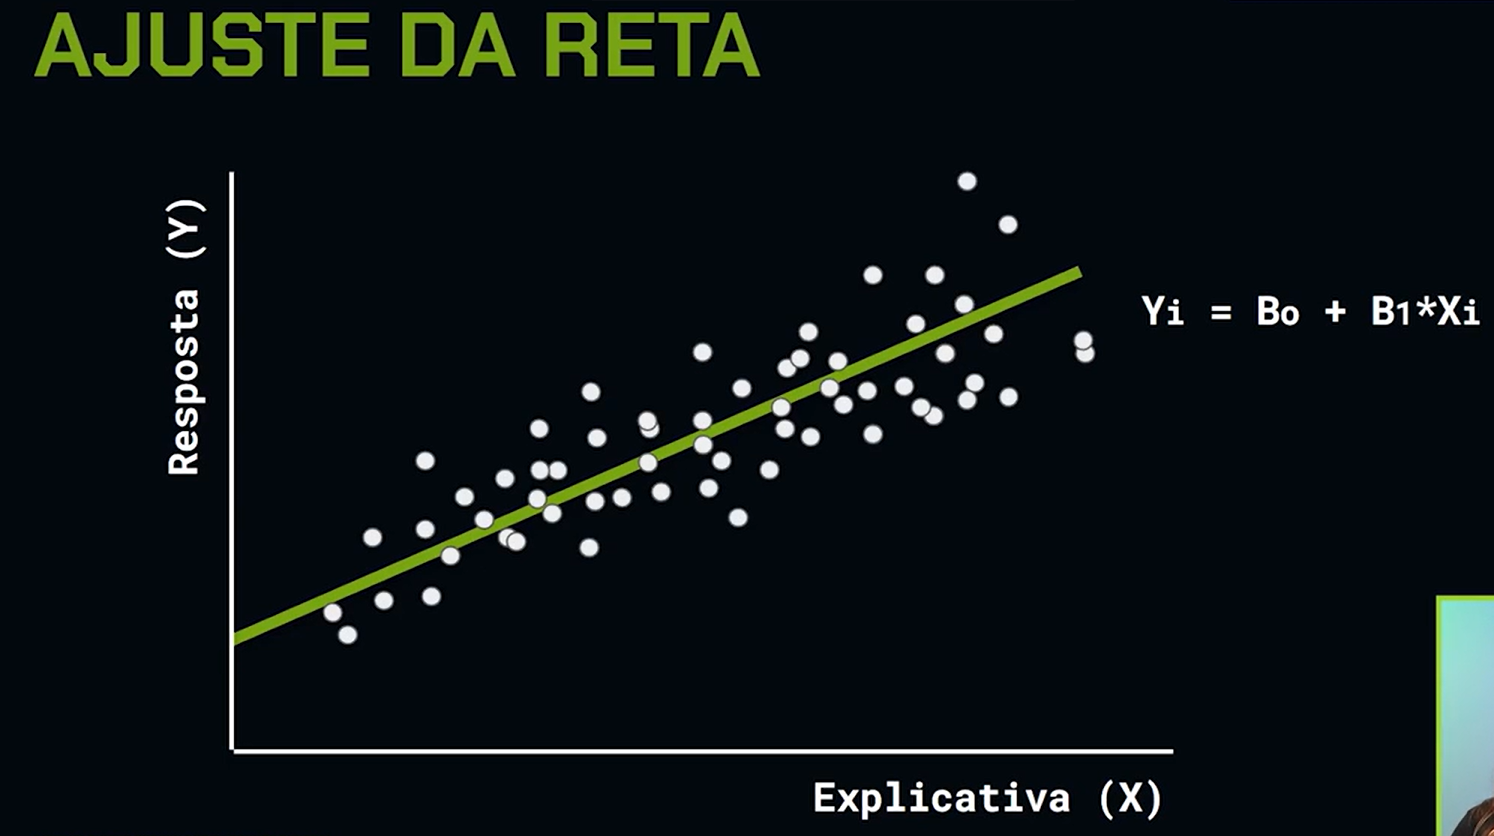

## Treino e teste

<ipython-input-51-a6ed6c4b4914>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='preco_de_venda', ylabel='Density'>

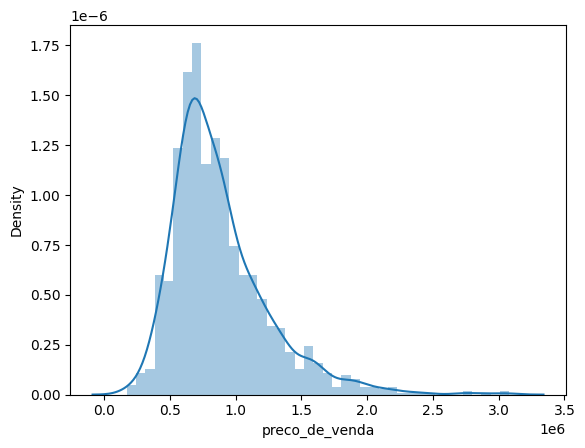

In [51]:
sns.distplot(dados_projeto['preco_de_venda'],kde = True)

- Nesse grafico de cima vemos o comportamento entre o preço e quantidade de vendas, vemos que maioria das casas sao vendidas entre 300 mil e 1 milhao de reais.

In [52]:
from sklearn.model_selection import train_test_split #Utiliza a biblioteca sklearn para fazer o treino e o testo

In [53]:
dados_projeto.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


In [54]:
x = dados_projeto[['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
                   'quantidade_banheiros', 'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']] #variavies de treinamento
y = dados_projeto[['preco_de_venda']] #valor de validação, o que modelo tentará adivvinhar

In [55]:
 treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size= 0.2,random_state= 42)

In [56]:
print(treino_x)

      area_primeiro_andar  existe_segundo_andar  area_segundo_andar  \
538               76.6425                     0              0.0000   
174              200.4782                     0              0.0000   
1390              96.6160                     0              0.0000   
303              185.8000                     0              0.0000   
1128             120.5842                     0              0.0000   
...                   ...                   ...                 ...   
1095              93.6432                     0              0.0000   
1130              53.1388                     1             50.0731   
1294              88.0692                     0              0.0000   
860               96.6160                     0              0.0000   
1126              62.4288                     1             23.4108   

      quantidade_banheiros  capacidade_carros_garagem  \
538                      1                        720   
174                      2       

In [57]:
from sklearn.linear_model import LinearRegression #importa a aplicações de regressão linear
modelo = LinearRegression() #chama o modelo de regrassão linear
modelo.fit(treino_x,treino_y) #treina o modelo com o dados de x e y
predicao = modelo.predict(teste_x) #faz a predição com os dados de teste
print(predicao) #Saída com preço previsto.

[[ 605242.1938617 ]
 [1184949.73072014]
 [1137239.77622188]
 [1036847.50626232]
 [ 891214.1396695 ]
 [ 795655.31100899]
 [1223526.20930637]
 [ 807552.34374514]
 [ 529161.0374617 ]
 [ 607229.65949524]
 [ 747126.88608756]
 [ 803822.28991984]
 [ 599378.0635486 ]
 [ 528272.43022379]
 [ 448987.61709052]
 [1110002.98017227]
 [1206126.25456135]
 [ 512277.49994142]
 [1403215.60555997]
 [ 827612.4658392 ]
 [ 884253.21357206]
 [ 630474.20648104]
 [2058394.84897715]
 [ 975592.60829244]
 [1002306.722187  ]
 [1318651.27539603]
 [ 772383.90294003]
 [ 794006.06955025]
 [1191921.46728358]
 [1111925.6186041 ]
 [ 596607.98461624]
 [1451275.30608492]
 [1089735.68148524]
 [ 678866.96344961]
 [ 864877.45882136]
 [ 713237.44693644]
 [ 336578.80149496]
 [ 648296.50941641]
 [ 478618.57426607]
 [ 889262.74166072]
 [ 521055.42295531]
 [ 701410.54451525]
 [ 427911.45069519]
 [ 846314.90795941]
 [ 588708.91290297]
 [ 377948.49840858]
 [ 519462.35947421]
 [1648705.83884433]
 [ 719704.10867578]
 [ 845045.78227668]


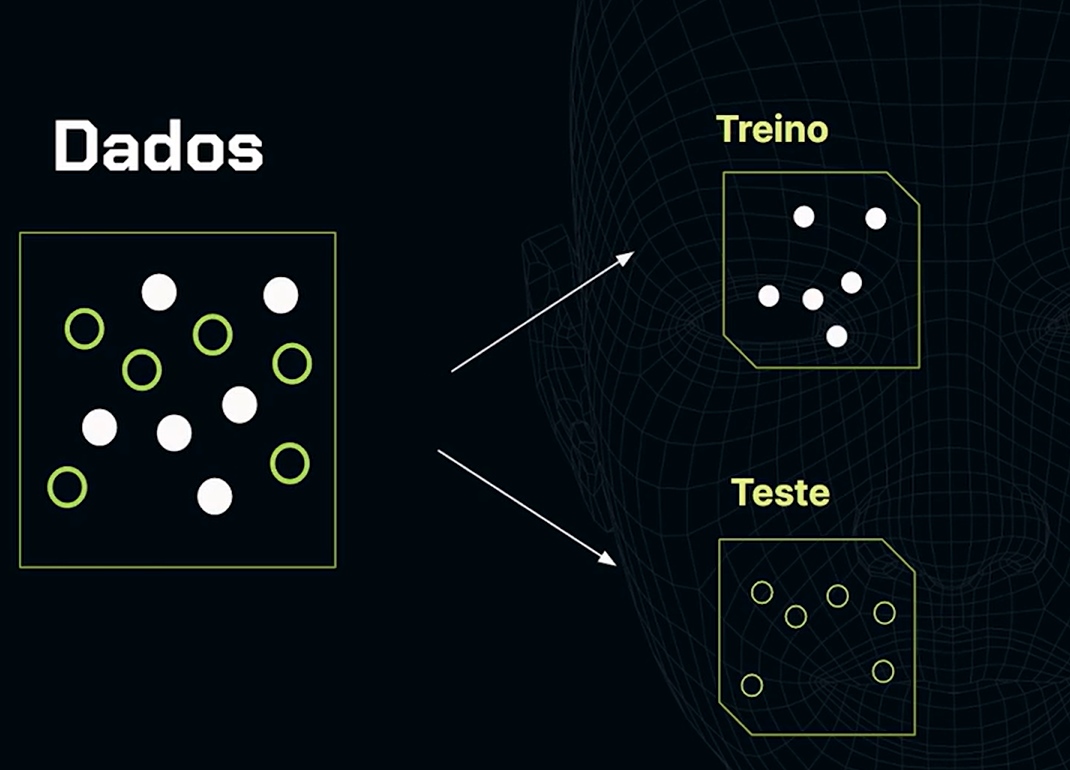


- treinar apenas com os dados da area do primeiro andar

In [58]:
x = dados_projeto[['area_primeiro_andar']]
y = dados_projeto[['preco_de_venda']]
print(len(x), len(y))  # Verifica quantas amostras existem


1438 1438


In [59]:
 treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size= 0.25,random_state= 230)

In [60]:
modelo_2 = LinearRegression() #chama o modelo de regrassão linear
modelo_2.fit(treino_x,treino_y) #treina o modelo com o dados de x e y
predicao = modelo_2.predict(teste_x) #faz a predição com os dados de teste
print(predicao) #Saída com preço previsto.

[[ 794870.22136325]
 [ 654573.23208984]
 [ 947067.40169111]
 [1309710.0659291 ]
 [ 947693.72753608]
 [1109912.12138347]
 [ 913872.13190767]
 [1424954.02140369]
 [1127449.24504265]
 [1107406.81800359]
 [ 724095.40088158]
 [1440612.16752796]
 [1240814.22298233]
 [ 923893.3454272 ]
 [ 821175.90685202]
 [1124943.94166277]
 [ 992789.18837397]
 [ 880050.53627926]
 [ 721590.09750169]
 [ 841844.65973605]
 [ 799254.50227805]
 [ 748522.10883543]
 [ 695910.7378579 ]
 [ 707184.60306737]
 [ 881929.51381417]
 [ 761674.95157981]
 [ 779212.07523899]
 [ 635783.45674072]
 [ 864392.39015499]
 [ 570645.56886378]
 [ 851239.54741061]
 [ 540581.92830519]
 [ 965230.85119526]
 [1267119.9084711 ]
 [ 611356.74878687]
 [ 794870.22136325]
 [ 872534.62613961]
 [1369837.34704628]
 [1215761.18918351]
 [ 948946.37922603]
 [ 898840.31162838]
 [ 834955.07544137]
 [ 702173.9963076 ]
 [ 846228.94065084]
 [ 694031.76032299]
 [1157512.88560124]
 [ 689647.47940819]
 [ 883808.49134908]
 [ 812407.34502243]
 [1211376.90826871]


- Para visualizar os parâmetros:

In [61]:
print("Coeficientes:", modelo_2.coef_)  # Exibe os coeficientes (pesos) do modelo
print("Intercepto:", modelo_2.intercept_)  # Exibe o intercepto do modelo []

Coeficientes: [[6741.9358985]]
Intercepto: [154765.20780329]


### Coeficientes e Intercepto na Regressão Linear

1. **Coeficientes (`coef_`)** representam os pesos atribuídos a cada variável independente (X) na equação do modelo de regressão linear.  
2. Eles indicam o impacto de cada variável preditora sobre a variável dependente (Y).  
3. **Intercepto (`intercept_`)** é o valor de Y quando todas as variáveis independentes são zero, representando o ponto onde a reta cruza o eixo Y.  
4. Y = Incepto + Coef * x_1 + coef*x_2........
5. Esses valores ajudam a interpretar a relação entre os dados e fazer previsões baseadas no modelo treinado.  


- Entao, para saber o preço de uma casa apartir desse dataset utilizaremos:

Y = 154765 + 6471 * (Area_primeiro_andar)

In [62]:
dados_projeto[['area_primeiro_andar']].head()

,area_primeiro_andar
0,79.5224
1,117.2398
2,85.4680
3,89.2769
4,106.3705


- Chegamos a conclusao que a area do primeiro andar contribui POSITIVAMENTE para o aumento do preço.

- Para calcular o erro medio quadratico:

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error #Utilizaremos a metricas da biblioteca sklearn
#mais especificamente a metrica mean_absolute_error
import numpy as np

In [64]:
# Erro Médio Quadrático (RMSE)
rmse = np.sqrt(mean_squared_error(teste_y, predicao)) # O erro medio quadratco é calculado apartir do teste_y (validação do teste)
# e tambem pelo modelo previsto
print("Erro Padrão (RMSE):", rmse)

# Erro Absoluto Médio (MAE)
mae = mean_absolute_error(teste_y, predicao)
print("Erro Absoluto Médio (MAE):", mae)

Erro Padrão (RMSE): 307237.0203769763
Erro Absoluto Médio (MAE): 231633.7679410926


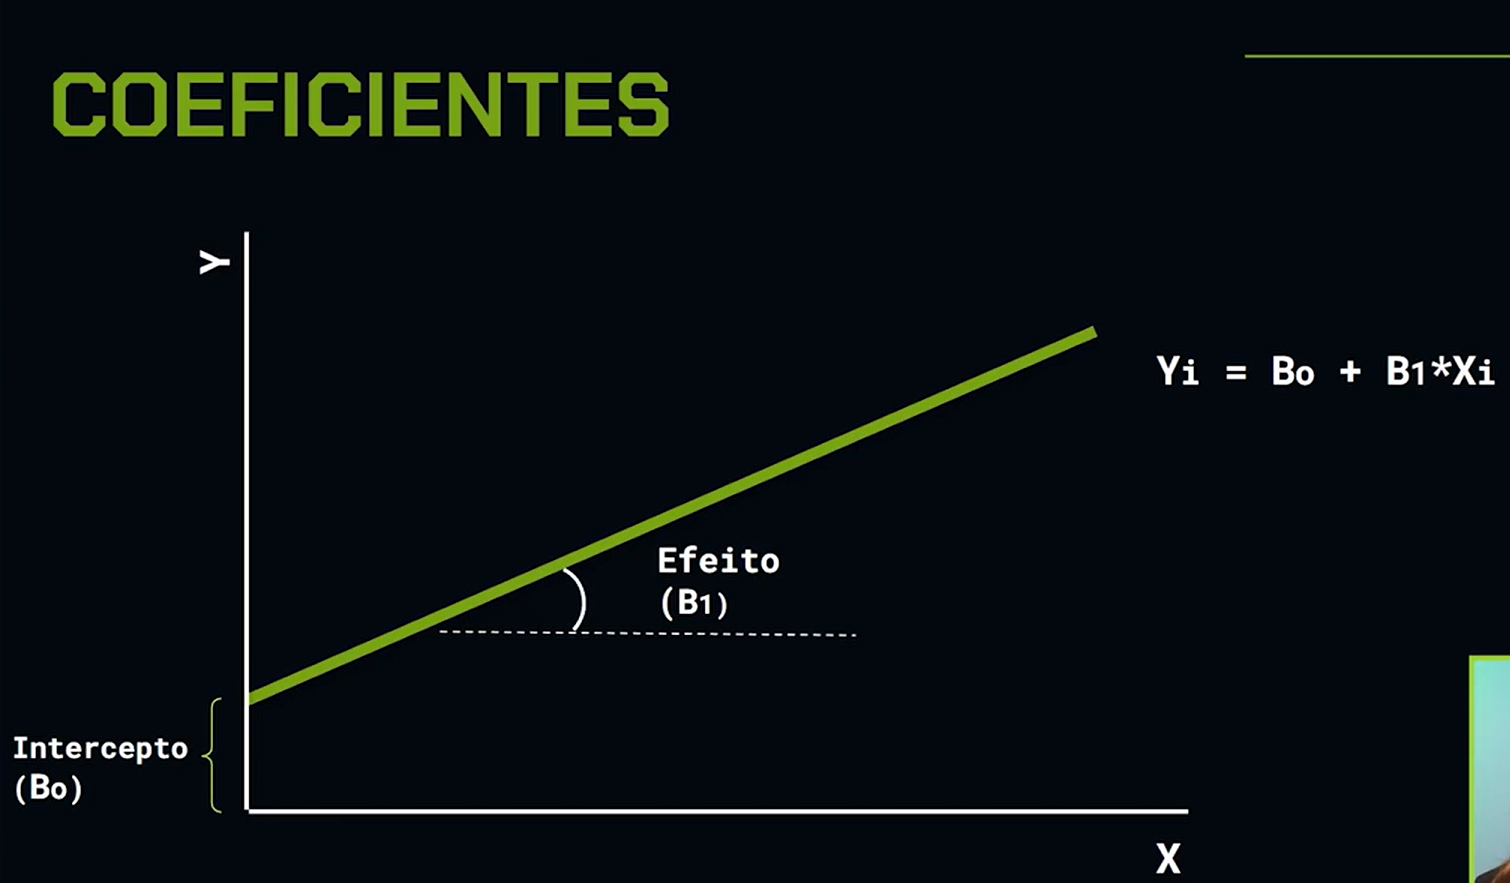

- Será que o primeiro andar da casa será suficiente para justificar o preço da casa?
- Para isso precisaremos analisar a explicabilidade do modelo, que pode ser calculado apartir da metrica r^2 que varia de 0 a 1, onde o 1 indica uma ajuste perfeito do modelo aos dados. -> neste caso todas as variações dependente são explicadas pelas variáveis independentes do modelo. Por outro lado, 0 indica que o modelo não explica nenhuma variabilidade

In [65]:
from sklearn.metrics import r2_score #metrica do Sklearn r2_score
r2 = r2_score(teste_y, predicao) #aplicação do r2_scoore
print("R²:", r2)

R²: 0.3776066876688613


## Para calcular o r^2 na mao:

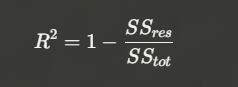

- SSres​ é a soma dos quadrados dos resíduos
- SStot​ é a soma total dos quadrados

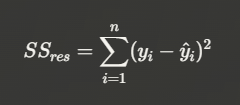


-yi​ são os valores reais

-y^​i​ são os valores preditos pelo modelo

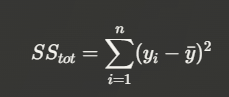

 - y- é a média dos valores reais

In [73]:
#vamos começar:
def calcular_r2_manualmente(teste_y,predicao):
# primeiro precisamos saber a media da dos valores reais.

  media_reais = np.mean(teste_y) #media dos valores de valdação de y

# calcular a soma do quadrado do residuo:
  ss_res = np.sum((teste_y - predicao)**2)

# calcular sstotal:
  ss_tot = np.sum((teste_y - media_reais) ** 2)

## calcular r^2:

  r2 = 1 - (ss_res/ss_tot)

  return(r2)

In [85]:
r2_calculado_manualmente = calcular_r2_manualmente(teste_y, predicao)
print(r2_calculado_manualmente)

preco_de_venda    0.377607
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



- Vemos que o valor bate igualmente ao calculado na biblioteca

- esse valor nos diz que 37% do valor do preço é explicado somente pela area do primeiro andar.

# 4. Entendendo os residuos:

------------------

- Quando menor a distancia entre a reta e os pontos é melhor

- A diferença entre o que estou estimando e a reta se chama resíduo.

In [91]:
ss_res_cada = teste_y - predicao
ss_res_cada

,preco_de_venda
997,-375820.221363
805,247616.767910
1138,-60160.401691
1391,-42700.065929
516,-80013.727536
...,...
481,-472056.650021
811,-105969.670260
238,-97483.232090
1304,-554310.099526


- Acima vemos o residuo de casa casa, ou seja a diferença entre o preço que o modelo previu e o que é real.

Text(0.5, 1.0, 'distribuição dos residuos')

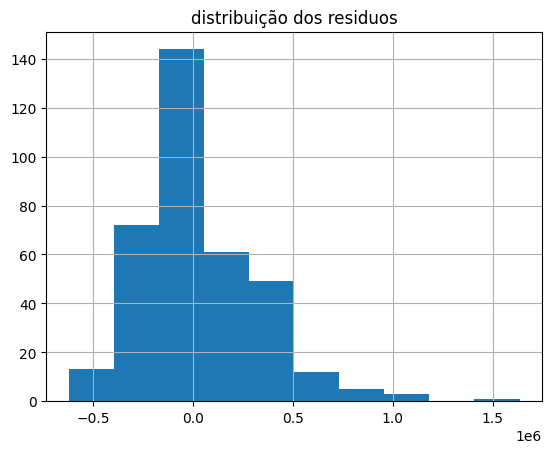

In [92]:
ss_res_cada.hist() # para plotar a distribuição
plt.title("distribuição dos residuos")

- O ideal é que a maioria dos residuos fique perto de 0, igual a esta acontecendo.

- Para calcular o R2 do treino:

In [112]:
r2_treino = modelo_2.score(treino_x, treino_y)
print("R² do treino:", r2_treino)

R² do treino: 0.3785351216302204


- vemos que deu algo bem parecido. O que é bom.

# 5. Adicionando outros fatores (Análise exploratoria de outras variáveis)
-----------------

## 5.1. Analisando outros fatores com pairplot

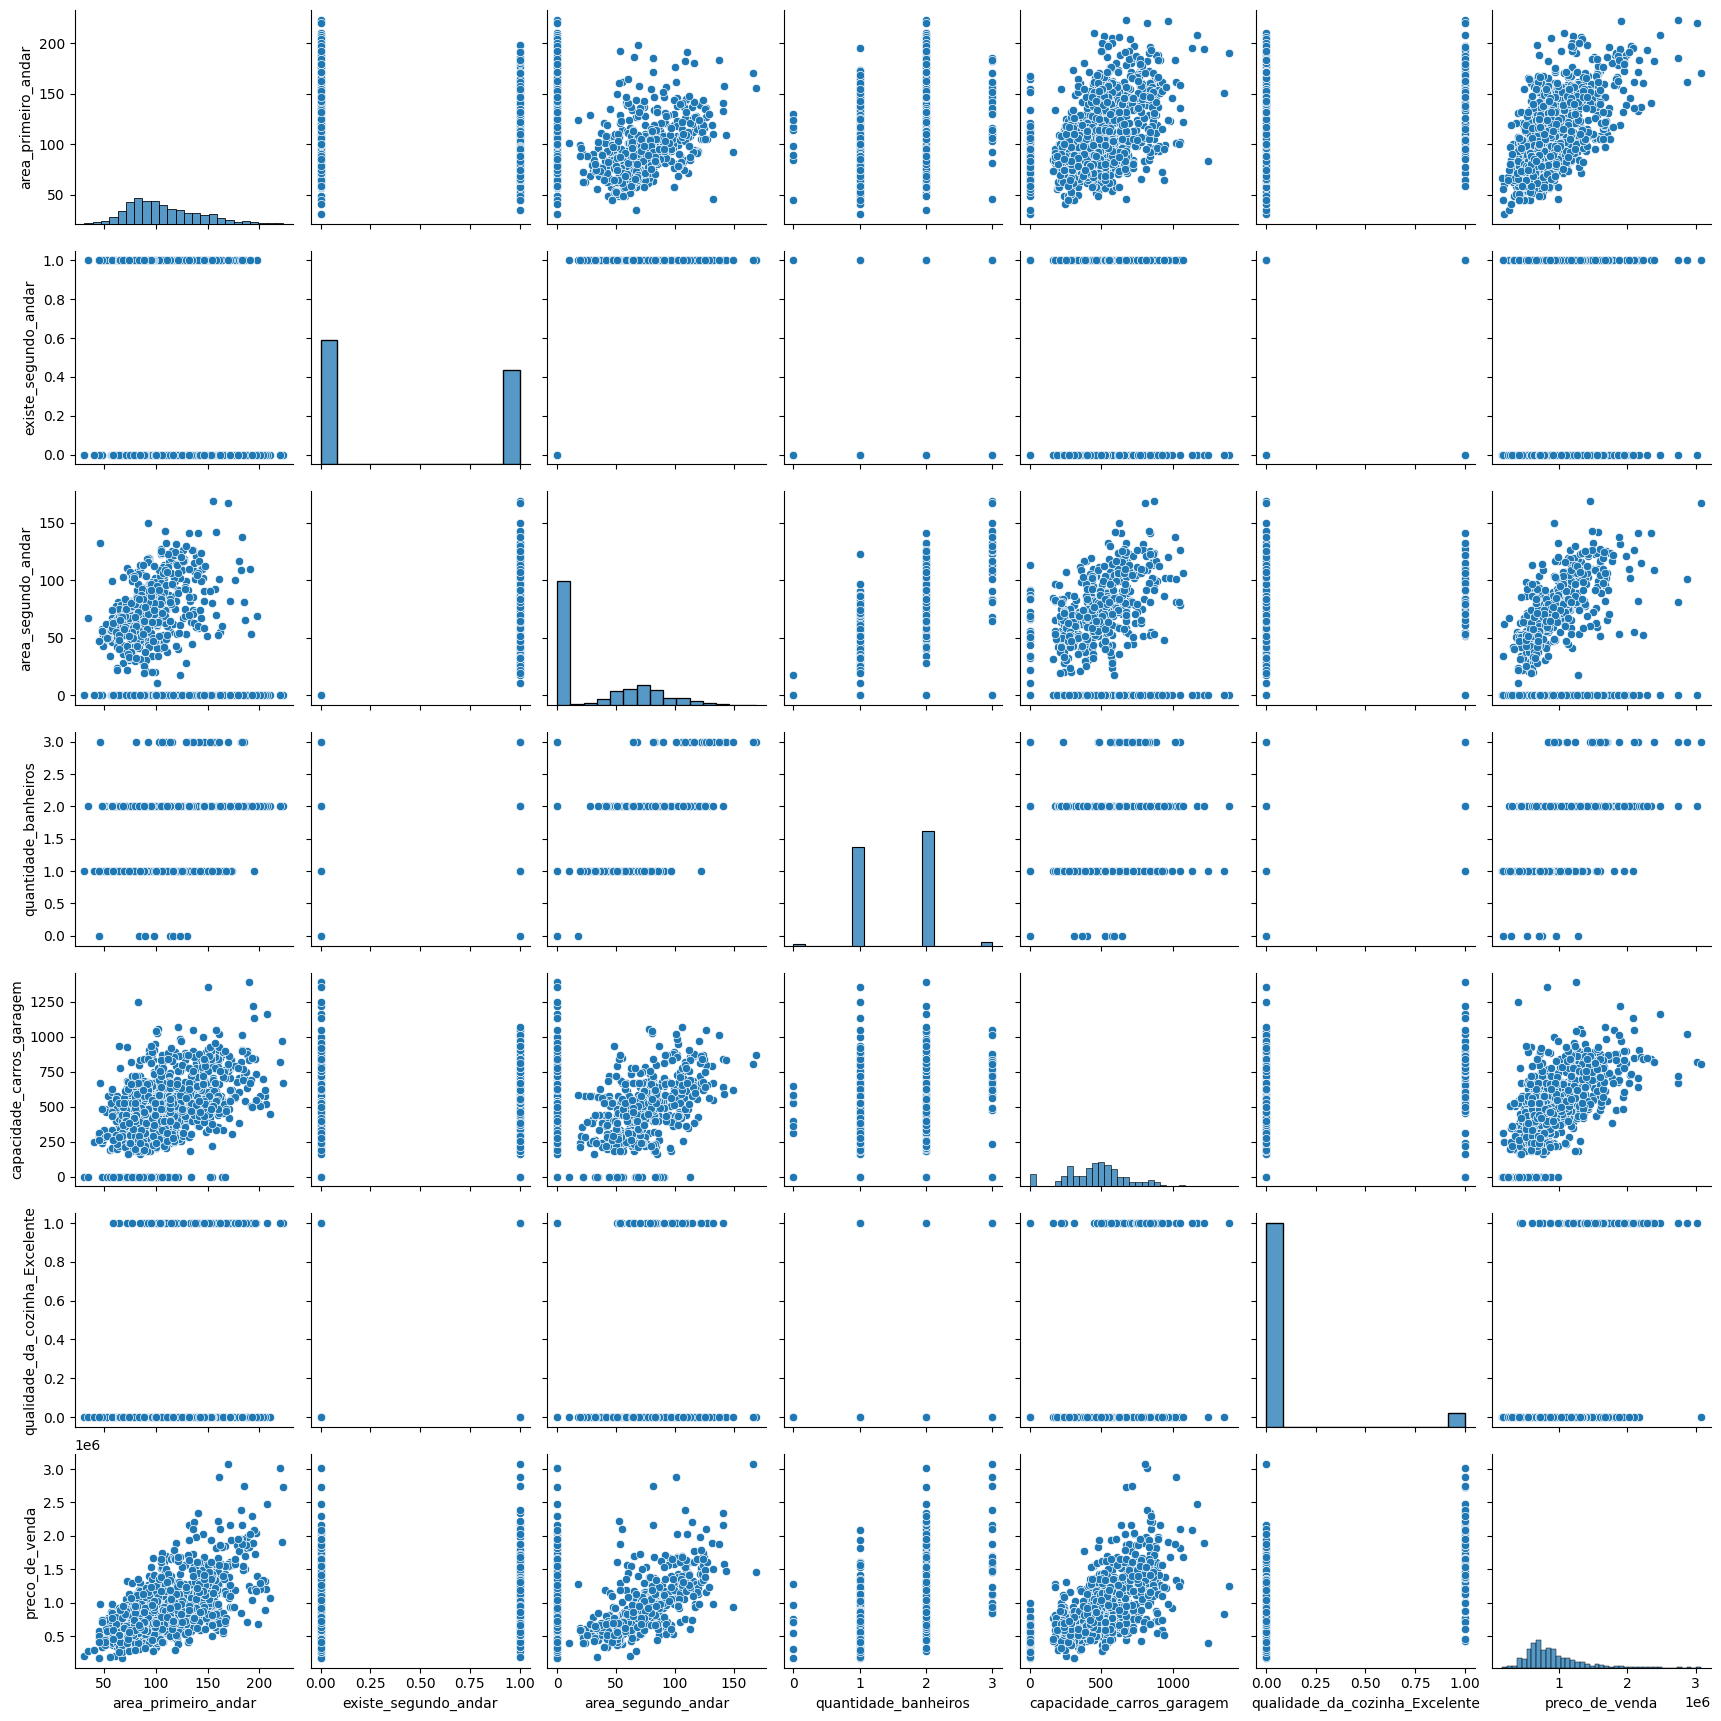

In [114]:
# Quais outras caracteristicas poderiam explicar o preço dos imoveis?
sns.pairplot(dados_projeto) #Este comando cria uma matriz de gráficos de dispersão para cada par de variáveis numéricas no DataFrame dados_projeto,
# permitindo visualizar facilmente as relações entre múltiplas variáveis simultaneamente.
# Irá cruzar varios dados

 - Todas as possibilidades de analise entre as variavveis

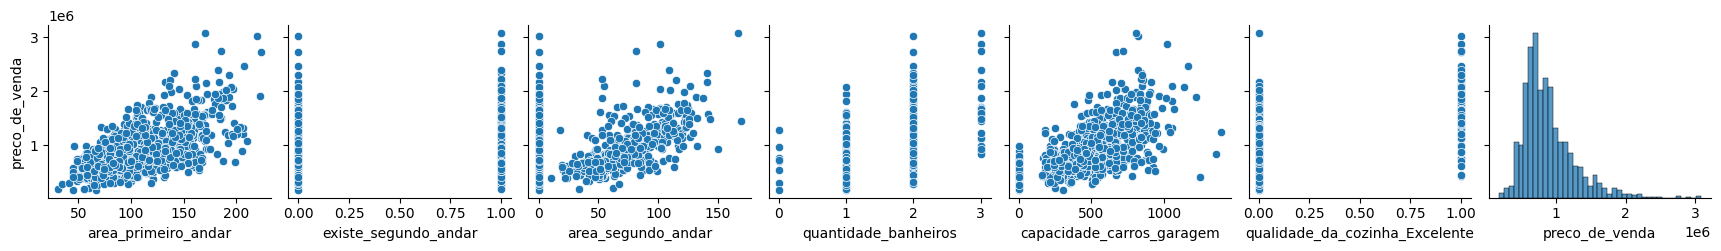

In [117]:
# vamos filtrar para analisar somente o que queremos, no caso a análise com y em vendas
sns.pairplot(dados_projeto, y_vars = 'preco_de_venda')
# ou seja, todas as variaveis em função do preço de venda

- vamos focar nos banheiros:

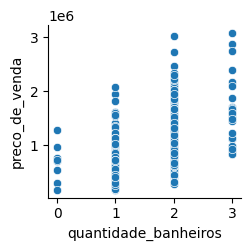

In [118]:
sns.pairplot(dados_projeto, y_vars = 'preco_de_venda', x_vars = 'quantidade_banheiros')

- Quanto maior a quantidade de banheiros maior é o preço.Essa é a análise que chegamos.
- Analise exploradoria de varaveis


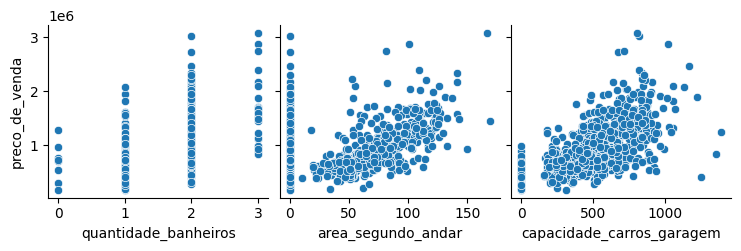

In [123]:
sns.pairplot(dados_projeto, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

- Da pra fazer outras analises aq tambem, como por exemplo quanto maor a area do segundo andar maior o valor
- Quanto maior a capacidade de carros na garagem maior o valor de venda.

## 5.2. Adicionando Variáveis no modelo